## Random Forest

In [2]:
#!pip install matplotlib
#!pip install scikit-learn
#!pip install pandas

### Using SKLearn

In [3]:
from sklearn import datasets
iris = datasets.load_iris()
print(f"Data: {iris.data[0]}")
print(f"Target: {iris.target[0]}")

Data: [5.1 3.5 1.4 0.2]
Target: 0


In [37]:
from sklearn.tree import DecisionTreeClassifier

clf_gini = DecisionTreeClassifier(criterion="gini", random_state=100, max_depth=5, min_samples_leaf=5, )

clf_gini.fit(iris.data, iris.target)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=5, random_state=100)

In [5]:
clf_gini.predict(iris.data)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [6]:
print(clf_gini.decision_path([[1, 2, 3, 4]]))

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 4 stored elements and shape (1, 11)>
  Coords	Values
  (0, 0)	1
  (0, 2)	1
  (0, 8)	1
  (0, 9)	1


In [7]:
from sklearn import tree
# Function to plot the decision tree
print(tree.export_text(clf_gini, feature_names=iris.feature_names, class_names=iris.target_names, show_weights=True))

print(tree.export_graphviz(clf_gini))

|--- petal length (cm) <= 2.45
|   |--- weights: [50.00, 0.00, 0.00] class: setosa
|--- petal length (cm) >  2.45
|   |--- petal width (cm) <= 1.75
|   |   |--- petal length (cm) <= 4.95
|   |   |   |--- sepal length (cm) <= 5.15
|   |   |   |   |--- weights: [0.00, 4.00, 1.00] class: versicolor
|   |   |   |--- sepal length (cm) >  5.15
|   |   |   |   |--- weights: [0.00, 43.00, 0.00] class: versicolor
|   |   |--- petal length (cm) >  4.95
|   |   |   |--- weights: [0.00, 2.00, 4.00] class: virginica
|   |--- petal width (cm) >  1.75
|   |   |--- petal length (cm) <= 4.95
|   |   |   |--- weights: [0.00, 1.00, 5.00] class: virginica
|   |   |--- petal length (cm) >  4.95
|   |   |   |--- weights: [0.00, 0.00, 40.00] class: virginica

digraph Tree {
node [shape=box, fontname="helvetica"] ;
edge [fontname="helvetica"] ;
0 [label="x[2] <= 2.45\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]"] ;
1 [label="gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]"] ;
0 -> 1 [labeldistance=2.5, lab

[Text(0.4444444444444444, 0.9, 'x[2] <= 2.45\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(0.3333333333333333, 0.7, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(0.38888888888888884, 0.8, 'True  '),
 Text(0.5555555555555556, 0.7, 'x[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(0.5, 0.8, '  False'),
 Text(0.3333333333333333, 0.5, 'x[2] <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(0.2222222222222222, 0.3, 'x[0] <= 5.15\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(0.1111111111111111, 0.1, 'gini = 0.32\nsamples = 5\nvalue = [0, 4, 1]'),
 Text(0.3333333333333333, 0.1, 'gini = 0.0\nsamples = 43\nvalue = [0, 43, 0]'),
 Text(0.4444444444444444, 0.3, 'gini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(0.7777777777777778, 0.5, 'x[2] <= 4.95\ngini = 0.043\nsamples = 46\nvalue = [0, 1, 45]'),
 Text(0.6666666666666666, 0.3, 'gini = 0.278\nsamples = 6\nvalue = [0, 1, 5]'),
 Text(0.8888888888888888, 0.3, 'gini = 0.0\nsam

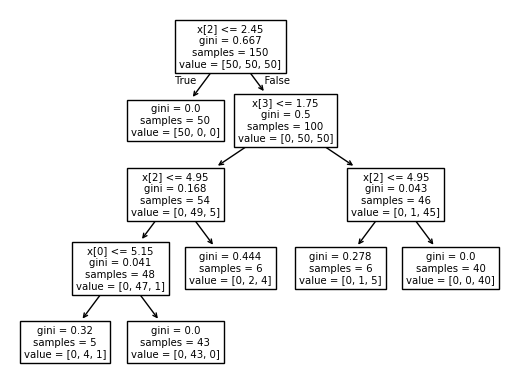

In [8]:
tree.plot_tree(clf_gini)

### Gini Impurity

In [9]:
import pandas as pd

iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df["target"] = iris.target
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [10]:
sort_df = iris_df.sort_values(by="petal length (cm)").reset_index()
#sort_df[sort_df["petal length (cm)"] <= 2.45]

sort_df[45:55]

,index,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
45,18,5.7,3.8,1.7,0.3,0
46,20,5.4,3.4,1.7,0.2,0
47,23,5.1,3.3,1.7,0.5,0
48,24,4.8,3.4,1.9,0.2,0
49,44,5.1,3.8,1.9,0.4,0
50,98,5.1,2.5,3.0,1.1,1
51,57,4.9,2.4,3.3,1.0,1
52,93,5.0,2.3,3.3,1.0,1
53,79,5.7,2.6,3.5,1.0,1
54,60,5.0,2.0,3.5,1.0,1


In [11]:
(1.9 + 3.0)/2

2.45

In [12]:
def gini_func(values):
    if len(values) == 0:
        return 0
    gini = 1
    for count in values.value_counts():
        gini -= (count/len(values))**2
    return gini

In [13]:
#gini_func(sort_df[sort_df["petal length (cm)"] > 2.45]["target"])
gini_func(pd.Series([1, 0, 1, 1, 1, 1, 2]))

0.44897959183673464

In [14]:
1 - ((5/7)**2 + (1/7)**2 + (1/7)**2)

0.44897959183673464

### Find Split

In [15]:
#One variable
def find_split(targets):
    low_index = ""
    low_gini = 1
    for index, row in enumerate(targets):
        gini = gini_func(targets[0:index])*(index/len(targets)) + gini_func(targets[index:])*(len(targets[index:])/len(targets))
        if gini < low_gini:
            low_gini = gini
            low_index = index
        #print(f"Gini: {gini}, Index: {index}")    
    #print(low_gini)
    #print(low_index)
    return low_gini, low_index
    

In [16]:
targets = sort_df["target"]
gini, index = find_split(pd.Series([0, 1, 1]))
print(gini, index)

0.0 1


## Find Split: Multiple Variables

In [17]:
def find_variable_split(df):
    low_gini = 1
    low_col = ""
    cut = 1
    for col in df.columns[0:-1]:
        df.sort_values(by=col, inplace=True, ignore_index=True)
        gini, index = find_split(df[df.columns[-1]])
        if gini < low_gini:
            low_gini = gini
            low_col = col
            if index == 0:
                cut = df[col][index]
            else:
                cut = (df[col][index] + df[col][index-1])/2
        #print(f"Gini: {gini, index} Col: {col}")
        
    return low_col, cut

In [18]:
low_col, cut = find_variable_split(iris_df)
print(f"Split: {low_col} <= {cut}")

Split: petal length (cm) <= 2.45


## Create Tree

In [19]:
class Node:
    def __init__(self):
        self.left = None
        self.right = None
        self.val = None
        self.col = None
        self.cut = None
        self.samples = None

    def __str__(self):
        return (f"val: {self.val} \ncol: {self.col} \ncut: {self.cut}")

    def predict(self, row):
        if (self.val is not None):
            return self.val
        elif row[self.col] < self.cut:
            return self.left.predict(row)
        else:
            return self.right.predict(row)

In [20]:
def print_tree(node, width=8, level=0):
    if node:
        print_tree(node.right, width, level + 1)
        print(' ' * width * level + '-> Leaf Value: ' + str(node.val))
        if node.col:
            print(' ' * width * level + '   Split: ' + str(node.col) + " < " + str(node.cut))
        else:
            print(' ' * width * level + '   Split: ' + str(node.col))
        print(' ' * width * level + '   Node: ' + str(node.samples))
        print_tree(node.left, width, level + 1)

In [21]:
n1 = Node()
n1.col = "Col 1"
n1.val = 5
print(n1)

val: 5 
col: Col 1 
cut: None


## Test

In [22]:
.32*(5/48)

0.03333333333333333

In [23]:
temp_df = iris_df[(iris_df.iloc[:, 2] > 2.45)].copy() # & (iris_df.iloc[:, 2] <= 4.95)  & (iris_df.iloc[:, 3] <= 1.75)
temp_df.sort_values(inplace=True, by="petal width (cm)")
#temp_df.reset_index(drop=True, inplace=True)
temp_df[0:50]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
50,5.0,2.3,3.3,1.0,1
51,4.9,2.4,3.3,1.0,1
52,5.0,2.0,3.5,1.0,1
53,5.7,2.6,3.5,1.0,1
54,5.5,2.4,3.7,1.0,1
55,6.0,2.2,4.0,1.0,1
56,5.8,2.7,4.1,1.0,1
57,5.5,2.4,3.8,1.1,1
58,5.6,2.5,3.9,1.1,1
59,5.1,2.5,3.0,1.1,1


In [24]:
#find_tree_split(temp_df[temp_df.columns[[3, -1]]], 5)
#find_tree_split(iris_df[iris_df.columns[-1]], iris_df[iris_df.columns[0]], 5)
#find_tree_split(pd.Series([0,0,1,1,2,2]), pd.Series([1.1, 1.2, 1.3, 1.4, 1.5, 1.6]), 1)
#find_tree_split(pd.DataFrame({"value": [1.1, 1.2, 1.3, 1.4, 1.4, 1.5], "target":[0,0,0,0,0,1]}), 1)

## End Test

In [25]:
#Includes min leaf size stopping condition
def find_tree_split(values, min_leaf_size): 
    low_gini = gini_func(values[values.columns[1]])
    cut = None
    distinct_values = values[values.columns[0]].drop_duplicates().reset_index(drop=True)

    for index, row in enumerate(distinct_values):
        left = values[values[values.columns[0]] <= row][values.columns[1]]
        right = values[values[values.columns[0]] > row][values.columns[1]]

        if len(left) < min_leaf_size or len(right) < min_leaf_size:
            continue

        gini = gini_func(left)*(len(left)/len(values)) + gini_func(right)*(len(right)/len(values))
        if gini < low_gini:
            low_gini = gini
            cut = (row + distinct_values[index+1])/2
        #print(f"gini: {gini},  cut: {row}")

    #print(f"FINAL: low gini: {low_gini}, low cut: {cut}") 
    return low_gini, cut

In [26]:
def create_tree(df, depth=0, min_leaf_size=1, min_split_size=2, max_depth=None):
    node = Node()
    low_gini = 1
    low_col = ""
    low_cut = None
    depth += 1

    length = len(df)

    node.samples = df[df.columns[-1]].value_counts(sort=False).to_dict()

    if max_depth is not None and depth > max_depth:
        node.val = df[df.columns[-1]].mode()[0]
        return node
    
    if min_split_size is not None and length < min_split_size:
        node.val = df[df.columns[-1]].mode()[0]
        return node

    for col in df.columns[0:-1]:
        sort_df = df.sort_values(by=col, ignore_index=True)
        gini, cut = find_tree_split(sort_df[[col, sort_df.columns[-1]]], min_leaf_size)
        if gini < low_gini:
            low_gini = gini
            low_col = col
            low_cut = cut
        
    #print(f"col: {low_col}, split: {low_col} < {low_cut} ")
    
    left_df = df[df[low_col] < low_cut].reset_index(drop=True).copy()
    right_df = df[df[low_col] >= low_cut].reset_index(drop=True).copy()

    if low_cut is None:
        node.val = df[df.columns[-1]].mode()[0]
        return node
    
    node.col = low_col
    node.cut = low_cut
    node.left = create_tree(left_df, depth, min_leaf_size, min_split_size, max_depth)
    node.right = create_tree(right_df, depth, min_leaf_size, min_split_size, max_depth)

        
    return node

In [27]:
root_node = create_tree(iris_df, min_leaf_size=5, max_depth=5)
print_tree(root_node, width=12)


                                    -> Leaf Value: 2
                                       Split: None
                                       Node: {2: 40}
                        -> Leaf Value: None
                           Split: petal length (cm) < 4.95
                           Node: {2: 45, 1: 1}
                                    -> Leaf Value: 2
                                       Split: None
                                       Node: {2: 5, 1: 1}
            -> Leaf Value: None
               Split: petal width (cm) < 1.75
               Node: {1: 50, 2: 50}
                                    -> Leaf Value: 2
                                       Split: None
                                       Node: {2: 4, 1: 2}
                        -> Leaf Value: None
                           Split: petal length (cm) < 4.95
                           Node: {1: 49, 2: 5}
                                                -> Leaf Value: 1
                                        

## Predict values

In [28]:
root_node.predict(iris_df.iloc[0])

np.int64(0)

In [29]:
print(iris_df.apply(root_node.predict, axis=1)[45:105])

45     0
46     0
47     0
48     0
49     0
50     1
51     1
52     1
53     1
54     1
55     1
56     1
57     1
58     1
59     1
60     1
61     1
62     1
63     1
64     1
65     1
66     1
67     1
68     1
69     1
70     1
71     1
72     1
73     1
74     1
75     1
76     1
77     1
78     1
79     1
80     1
81     1
82     1
83     1
84     2
85     1
86     1
87     1
88     1
89     1
90     1
91     1
92     1
93     1
94     1
95     1
96     2
97     2
98     1
99     1
100    2
101    2
102    2
103    1
104    2
dtype: int64


## Random Forest

### Sklearn

In [36]:
from sklearn.ensemble import RandomForestClassifier
import time

start = time.time()

sk_rf = RandomForestClassifier(criterion="gini", random_state=100, max_depth=5, min_samples_leaf=5)

sk_rf.fit(iris.data, iris.target)

end = time.time()
print(end - start)

0.07101821899414062


### Implementation

In [77]:
import random

def create_rf_tree(df, num_feat=-1, depth=0, min_leaf_size=1, min_split_size=2, max_depth=None):
    node = Node()
    low_gini = 1
    low_col = ""
    low_cut = None
    depth += 1

    length = len(df)

    node.samples = df[df.columns[-1]].value_counts(sort=False).to_dict()

    if num_feat == -1:
        num_feat = len(df.columns[0:-1])

    if max_depth is not None and depth > max_depth:
        node.val = df[df.columns[-1]].mode()[0]
        return node
    
    if min_split_size is not None and length < min_split_size:
        node.val = df[df.columns[-1]].mode()[0]
        return node

    cols = df.columns[random.sample(range(len(df.columns[0:-1])), num_feat)]

    for col in cols:
        sort_df = df.sort_values(by=col, ignore_index=True)
        gini, cut = find_tree_split(sort_df[[col, sort_df.columns[-1]]], min_leaf_size)
        if gini < low_gini:
            low_gini = gini
            low_col = col
            low_cut = cut
        
    #print(f"col: {low_col}, split: {low_col} < {low_cut} ")
    
    left_df = df[df[low_col] < low_cut].reset_index(drop=True).copy()
    right_df = df[df[low_col] >= low_cut].reset_index(drop=True).copy()

    if low_cut is None:
        node.val = df[df.columns[-1]].mode()[0]
        return node
    
    node.col = low_col
    node.cut = low_cut
    node.left = create_tree(left_df, depth, min_leaf_size, min_split_size, max_depth)
    node.right = create_tree(right_df, depth, min_leaf_size, min_split_size, max_depth)

        
    return node

In [56]:
def create_random_forest(df, num_feat=-1, min_leaf_size=1, min_split_size=2, max_depth=None, num_trees=100):
    trees = []
    for i in range(num_trees):
        tree = create_rf_tree(df.sample(frac=1, replace=True), num_feat=num_feat, min_leaf_size=min_leaf_size, min_split_size=min_split_size, max_depth=max_depth)
        trees.append(tree)
        print(i)
    return trees

In [100]:
trees = create_random_forest(iris_df, num_feat=2, min_leaf_size=5, max_depth=5)
print_tree(trees[0])

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
                                -> Leaf Value: 2
                                   Split: None
                                   Node: {2: 26}
                        -> Leaf Value: None
                           Split: sepal length (cm) < 5.95
                           Node: {2: 34, 1: 1}
                                -> Leaf Value: 2
                                   Split: None
                                   Node: {2: 8, 1: 1}
                -> Leaf Value: None
                   Split: petal width (cm) < 1.75
                   Node: {2: 42, 1: 5}
                                -> Leaf Value: 2
                                   Split: None
                                   Node: {2:

In [99]:
root_node = create_rf_tree(iris_df, min_leaf_size=1, max_depth=5, num_feat=4)
print_tree(root_node, width=12)

                                    -> Leaf Value: 2
                                       Split: None
                                       Node: {2: 43}
                        -> Leaf Value: None
                           Split: petal length (cm) < 4.85
                           Node: {2: 45, 1: 1}
                                                -> Leaf Value: 2
                                                   Split: None
                                                   Node: {2: 2}
                                    -> Leaf Value: None
                                       Split: sepal length (cm) < 5.95
                                       Node: {1: 1, 2: 2}
                                                -> Leaf Value: 1
                                                   Split: None
                                                   Node: {1: 1}
            -> Leaf Value: None
               Split: petal width (cm) < 1.75
               Node: {1: 50, 2: 50}
          